In [3]:
import os
import cv2
from matplotlib import pyplot as plt

def choose_image_from_folder(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', 'webp'))]
    
    if not image_files:
        print("Không tìm thấy ảnh nào trong thư mục.")
        return None

    print("Danh sách ảnh có trong thư mục:")
    for i, filename in enumerate(image_files):
        print(f"{i + 1}. {filename}")
    
    try:
        choice = int(input("Chọn số tương ứng với ảnh bạn muốn dùng: "))
        if 1 <= choice <= len(image_files):
            return os.path.join(folder_path, image_files[choice - 1])
        else:
            print("Lựa chọn không hợp lệ.")
            return None
    except ValueError:
        print("Vui lòng nhập số hợp lệ.")
        return None

# Sử dụng
folder_path = "D:/Workspace/Intern_Bdata/data"
image_file = choose_image_from_folder(folder_path)

img = cv2.imread(image_file) if image_file else None

if img is None:
    print("Không đọc được ảnh.")
else:
    print(f"Đọc ảnh thành công: {image_file}")


Danh sách ảnh có trong thư mục:
1. ba1.jpg
2. ba2.webp
3. dan.jpg
4. grv.jpg
5. test.png
6. test2.jpg
7. testchu1.png
8. tin.jpg
9. tm.webp
Đọc ảnh thành công: D:/Workspace/Intern_Bdata/data\testchu1.png


In [4]:
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    figsize = width / float(dpi), height / float(dpi)

    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    ax.axis('off')

    ax.imshow(im_data, cmap='gray')

    plt.show()


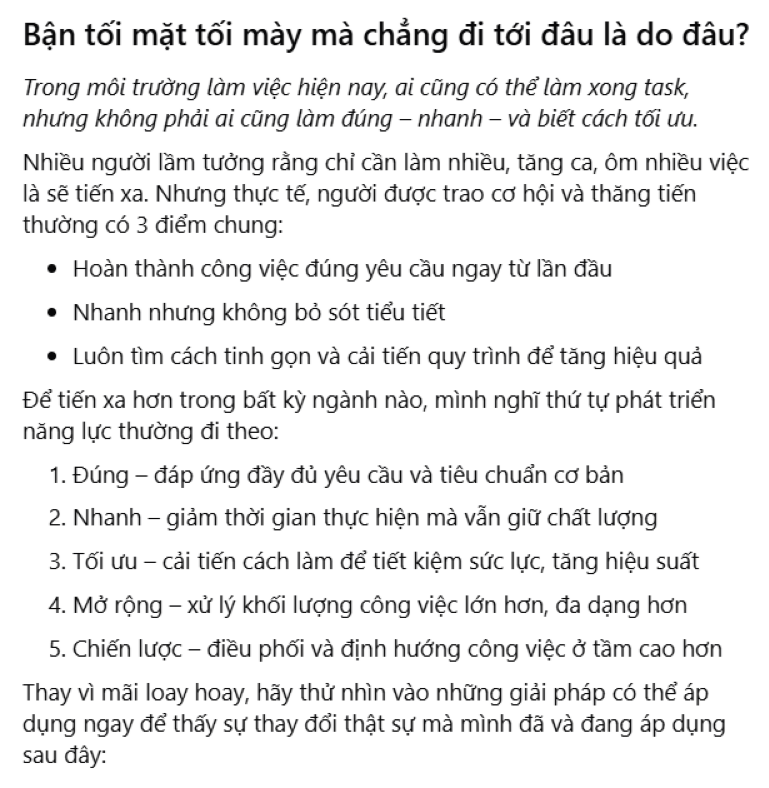

In [5]:
display(image_file)

KIỂM TRA ẢNH ĐÃ ĐÚNG HƯỚNG THẲNG ĐỨNG CHƯA

In [6]:
import pytesseract
import os

def correct_rotation(image):
    # Sử dụng OSD (Orientation and Script Detection)
    osd = pytesseract.image_to_osd(image)
    
    rotate_angle = 0
    for line in osd.split('\n'):
        if "Rotate" in line:
            rotate_angle = int(line.split(":")[-1].strip())
            break

    print(f"Ảnh bị xoay: {rotate_angle} độ")

    if rotate_angle == 0:
        print("→ Ảnh đã đúng chiều, không cần xoay.")
        return image  # Không cần xoay lại
    else:
        print("→ Ảnh đang bị xoay. Đang tiến hành xoay lại ảnh...")

        # Map góc xoay với hàm cv2.rotate
        rotation_map = {
            90: cv2.ROTATE_90_COUNTERCLOCKWISE,
            180: cv2.ROTATE_180,
            270: cv2.ROTATE_90_CLOCKWISE
        }

        rotated = cv2.rotate(image, rotation_map[rotate_angle])
        return rotated


Ảnh bị xoay: 0 độ
→ Ảnh đã đúng chiều, không cần xoay.


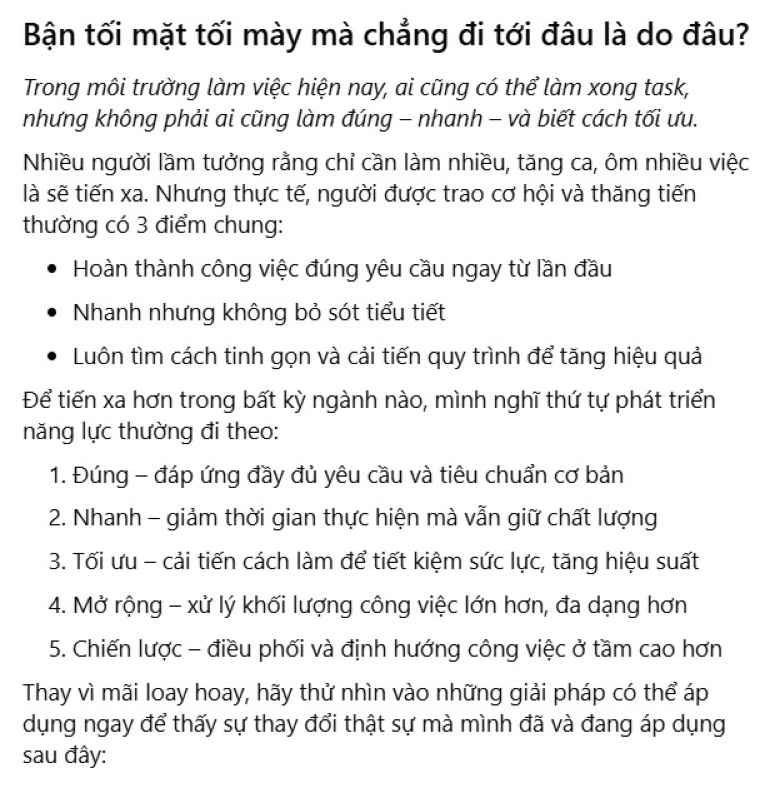

In [7]:
corrected_img = correct_rotation(img)

cv2.imwrite("output/rotated_checked.jpg", corrected_img)
display("output/rotated_checked.jpg")


NẾU ẢNH GỐC ĐÃ LÀ CHỮ ĐEN NỀN TRẮNG, THÌ BỎ QUA BƯỚC BÊN DƯỚI
Một số ảnh có thể là chữ trắng trên nền đen, nên cần đảo lại.

In [ ]:
if corrected_img is not None:
    inverted_image = cv2.bitwise_not(corrected_img)

    success = cv2.imwrite("output/inverted.jpg", inverted_image)
    print("Ghi ảnh thành công:" if success else "Không ghi được ảnh")
else:
    print("Không thể đảo ảnh vì 'corrected_img' là None.")
    

In [ ]:
display("output/inverted.jpg")

CHUYỂN XÁM LÀ ĐỀU BẮT BUỘC

In [8]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [9]:
gray_image = grayscale(corrected_img)
cv2.imwrite("output/gray.jpg", gray_image)

True

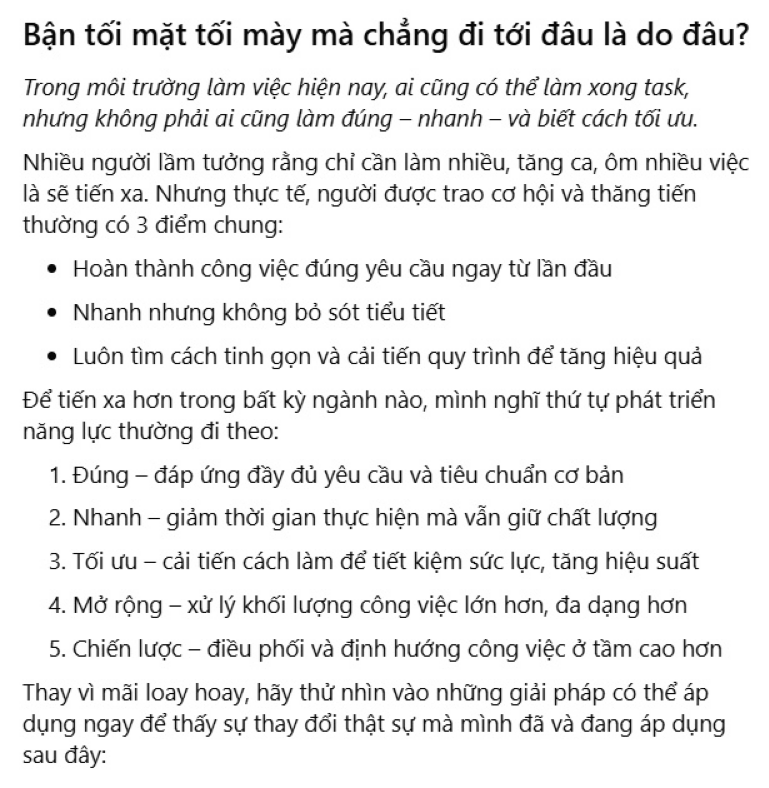

In [10]:
display("output/gray.jpg")

CHUYỂN ẢNH XÁM SANG NHỊ PHÂN

In [11]:
_, im_bw = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2.imwrite("output/bw_image.jpg", im_bw)

True

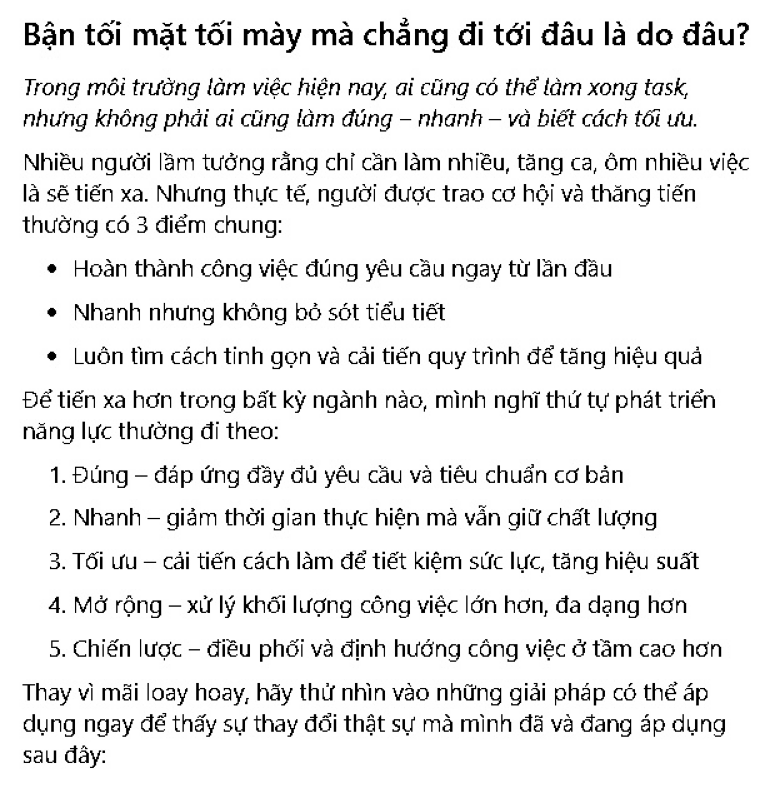

In [12]:
display("output/bw_image.jpg")

LOẠI BỎ NHIỄU

In [13]:
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return (image)

In [14]:
no_noise = noise_removal(im_bw)
cv2.imwrite("output/no_noise.jpg", no_noise)

True

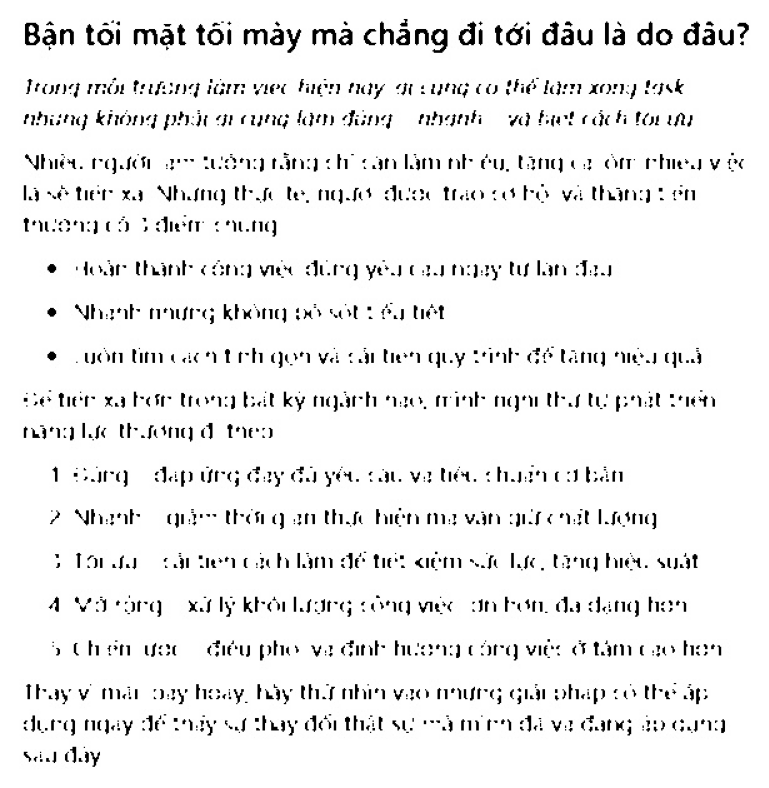

In [15]:
display("output/no_noise.jpg")

NẾU ẢNH SAU KHI LOẠI NHIỄU, CHỮ ĐẬM LÀ CHẠY CODE BÊN DƯỚI

In [ ]:
def thin_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

In [ ]:
eroded_image = thin_font(no_noise)
cv2.imwrite("output/eroded_image.jpg", eroded_image)

In [ ]:
display("output/eroded_image.jpg")

NẾU ẢNH SAU KHI LOẠI NHIỄU, CHỮ NHẠT THÌ CHẠY CODE BÊN DƯỚI

In [16]:
def thick_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

In [17]:
dilated_image = thick_font(no_noise)
cv2.imwrite("output/dilated_image.jpg", dilated_image)

True

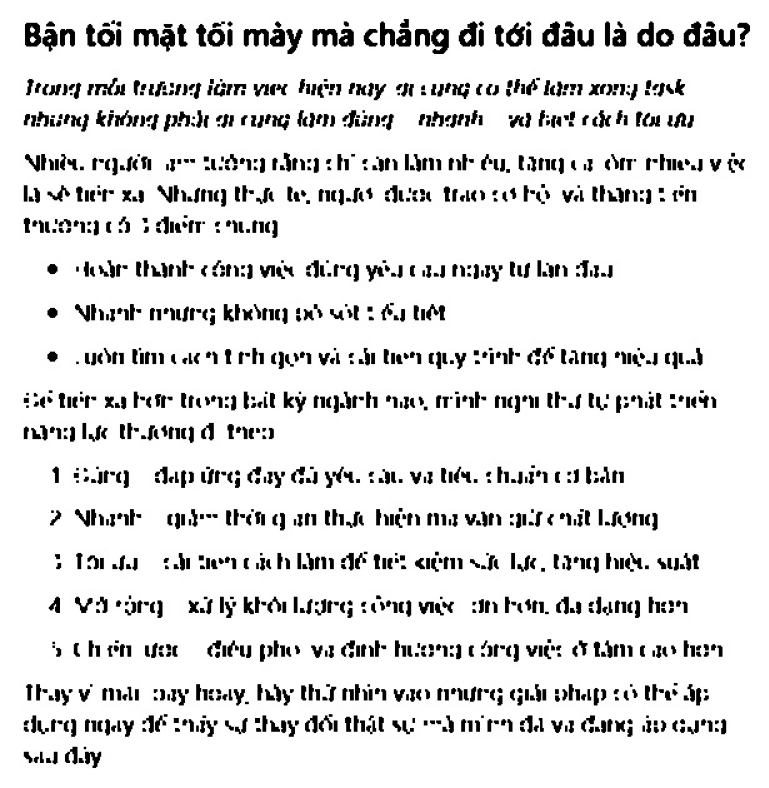

In [18]:
display("output/dilated_image.jpg")

XÁC ĐỊNH VÀ SỬA ĐỘ NGHIÊNG

In [19]:
def getSkewAngle(cvImage) -> float:
    newImage = cvImage.copy()
    gray = cv2.cvtColor(newImage, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9, 9), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilate = cv2.dilate(thresh, kernel, iterations=2)

    contours, _ = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)

    if not contours:
        print("Không tìm thấy contour nào để tính góc.")
        return 0

    largestContour = contours[0]
    rect = cv2.minAreaRect(largestContour)
    angle = rect[-1]

    # Sửa lỗi khi góc là -90 hoặc tương tự
    if angle < -45:
        angle = angle + 90
    elif angle > 45:
        angle = angle - 90

    return -angle  # Đảo dấu để xoay ngược lại đúng chiều


In [20]:
angle = getSkewAngle(img)
print(" Góc nghiêng của văn bản (ước lượng): {:.2f} độ".format(angle))


 Góc nghiêng của văn bản (ước lượng): -0.00 độ


CẮT BIÊN NGOÀI

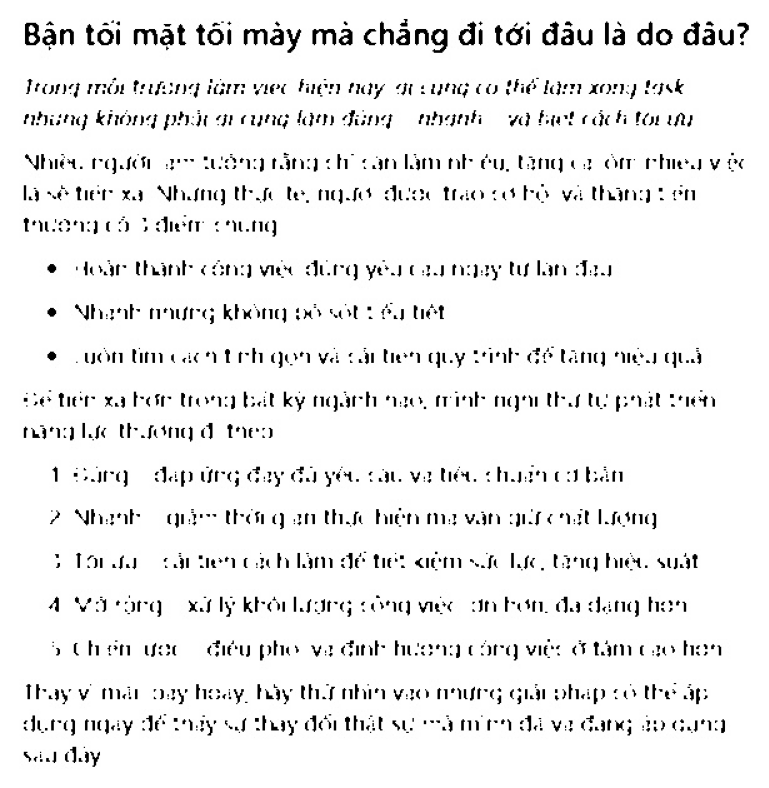

In [21]:
def remove_borders(image):
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cntsSorted = sorted(contours, key=lambda x: cv2.contourArea(x))
    if not cntsSorted:
        print("Không tìm thấy contour để cắt viền.")
        return image
    cnt = cntsSorted[-1]
    x, y, w, h = cv2.boundingRect(cnt)
    crop = image[y:y + h, x:x + w]
    return crop

no_borders = remove_borders(no_noise)
cv2.imwrite("output/no_borders.jpg", no_borders)
display("output/no_borders.jpg")

THÊM VIỀN TRẮNG

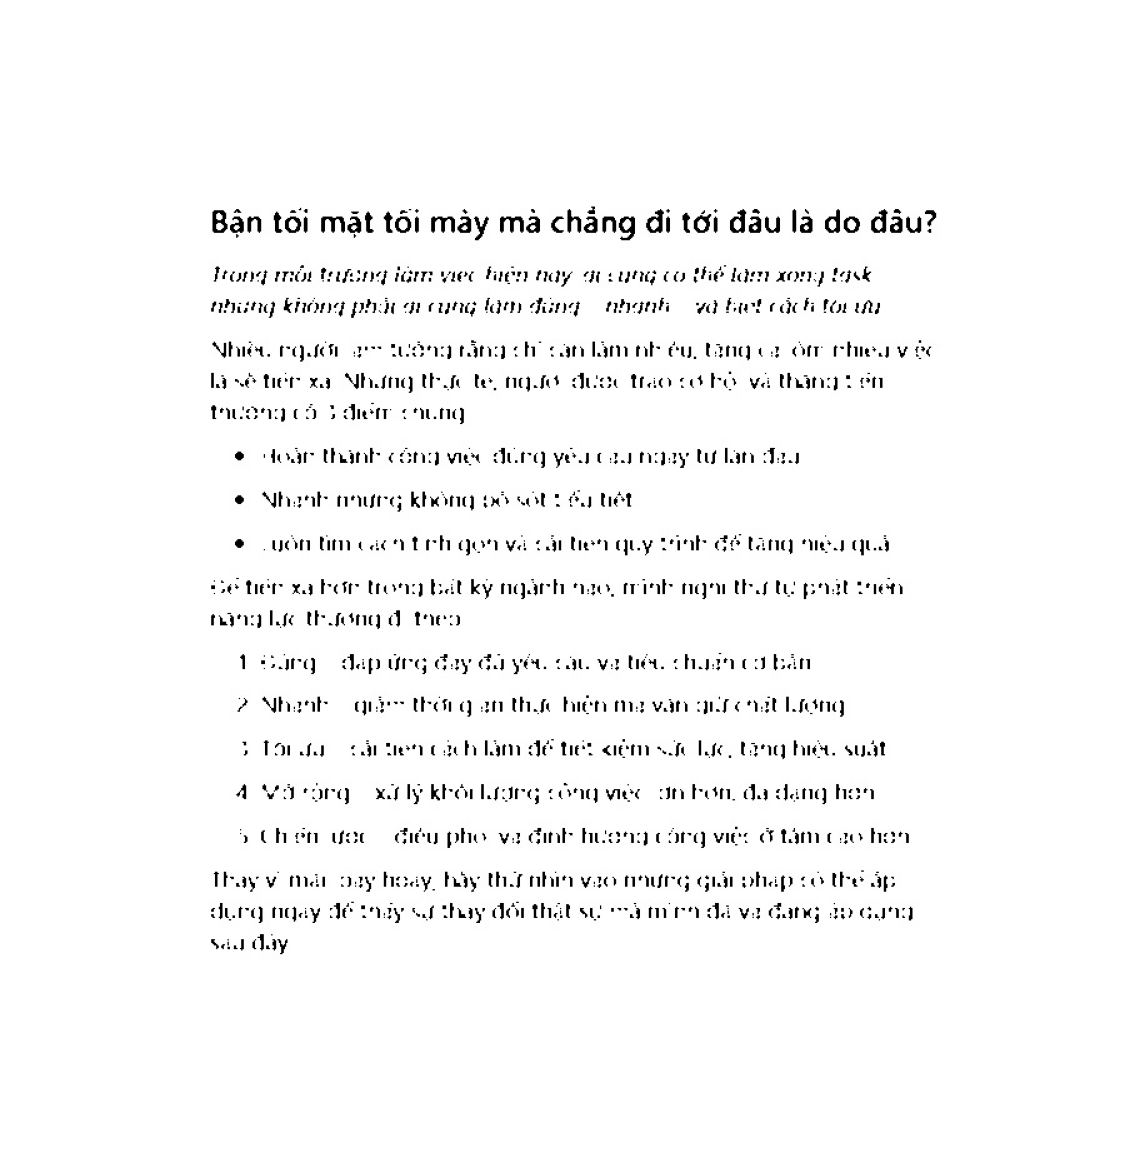

In [22]:
color = [255, 255, 255]
top, bottom, left, right = [150] * 4
image_with_border = cv2.copyMakeBorder(no_borders, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
cv2.imwrite("output/image_with_border.jpg", image_with_border)
display("output/image_with_border.jpg")

In [ ]:
# new = cv2.imread("D:/Intern/data/test.png")
# display("D:/Intern/data/test.png")

In [ ]:
# import numpy as np

# def getSkewAngle(cvImage) -> float:
    
#     newImage = cvImage.copy()
#     gray = cv2.cvtColor(newImage, cv2.COLOR_BGR2GRAY)
#     blur = cv2.GaussianBlur(gray, (9, 9), 0)
#     thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

#     kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
#     dilate = cv2.dilate(thresh, kernel, iterations=2)

#     contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
#     contours = sorted(contours, key = cv2.contourArea, reverse = True)
#     for c in contours:
#         rect = cv2.boundingRect(c)
#         x,y,w,h = rect
#         cv2.rectangle(newImage,(x,y),(x+w,y+h),(0,255,0),2)

#     largestContour = contours[0]
#     print (len(contours))
#     minAreaRect = cv2.minAreaRect(largestContour)
#     cv2.imwrite("output/boxes.jpg", newImage)

#     angle = minAreaRect[-1]
#     if angle < -45:
#         angle = 90 + angle
#     return -1.0 * angle

# def rotateImage(cvImage, angle: float):
#     newImage = cvImage.copy()
#     (h, w) = newImage.shape[:2]
#     center = (w // 2, h // 2)
#     M = cv2.getRotationMatrix2D(center, angle, 1.0)
#     newImage = cv2.warpAffine(newImage, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
#     return newImage

In [ ]:
# display("output/boxes.jpg")

In [ ]:
# def deskew(cvImage):
#     angle = getSkewAngle(cvImage)
#     return rotateImage(cvImage, -1.0 * angle)

In [ ]:
# fixed = deskew(new)
# cv2.imwrite("output/rotated_fixed.jpg", fixed)

In [ ]:
# display("output/rotated_fixed.jpg")

In [ ]:
# display("output/no_noise.jpg")

In [ ]:
# def remove_borders(image):
#     contours, heiarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     cntsSorted = sorted(contours, key=lambda x:cv2.contourArea(x))
#     cnt = cntsSorted[-1]
#     x, y, w, h = cv2.boundingRect(cnt)
#     crop = image[y:y+h, x:x+w]
#     return (crop)

In [ ]:
# no_borders = remove_borders(no_noise)
# cv2.imwrite("output/no_borders.jpg", no_borders)
# display('output/no_borders.jpg')

In [ ]:
# color = [255, 255, 255]
# top, bottom, left, right = [150]*4

In [ ]:
# image_with_border = cv2.copyMakeBorder(no_borders, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
# cv2.imwrite("output/image_with_border.jpg", image_with_border)
# display("output/image_with_border.jpg")